# InstaBot 2

# 1.Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

# 1.1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [8]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.keys import Keys                           
from selenium.webdriver.support.ui import Select                          
from selenium.webdriver.support.ui import WebDriverWait                    
from selenium.webdriver.support import expected_conditions as EC           
from selenium.webdriver.common.by import By 
from selenium.common.exceptions import TimeoutException
import time                                                               
from bs4 import BeautifulSoup            
import matplotlib.pyplot as plt     
from selenium.common.exceptions import TimeoutException
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\CSROY\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


In [11]:
driver.get('https://www.instagram.com/')#opening instagram
wait = WebDriverWait(driver, 10)                                               
d = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/section/main/article/div[2]/div[1]/div/form/div/div[1]/div/label/input'))) #click on username input box
d.send_keys('erenmika3')   #typing name  in username box                                                   
e=driver.find_element_by_name('password')  #searching password box                                     
e.send_keys('anime#2001')     #typing password in password box                                                                                                                 
wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/section/main/article/div[2]/div[1]/div/form/div/div[3]/button'))).click() #clicking on login button 

After the above code we have successfully entered in site of instagram of the  sample username

In [46]:
a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))  #input box
a.send_keys('food')          #passing keys
time.sleep(3)
handles = driver.find_elements_by_xpath('//div[@class="fuqBx "]/div/a/div/div[2]/div/div/div') #fecthing hadles of food 
food_list = {}

## 2 reasons for choosing 13 even though questioin says 10
## 1.I saw a major food handle yourfoodhandle is being left out of top 10 so I increased the area of scrapping
## 2.A food handle was named just food so it was always directing the site to foodtalkindia.So increased area of scrapping

for i in handles[0:13]:
    if(i.text[0]=='#'):
        continue
    else:
        food_list[i.text.strip()]=0 
##Saving the name of handles in food_list

a.clear()

for i in food_list:
    a=driver.find_element_by_xpath('/html/body/div[1]/section/nav/div[2]/div/div/div[2]/input')##search box
    a.send_keys(i)            ##typing the name 
    time.sleep(5)
    ##clicking on the search button
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div').click()            #appending username
    time.sleep(5)                             ##giving some time for the required page to load
    b=BeautifulSoup(driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span').get_attribute("outerHTML"),'html.parser').span['title']
    p=b.split(",")            ##the followers will obtained in the form like 334,234 so to convert to number we have to use split                                    
    ccount=int("".join(p))    ##converted to integer
    print(i,ccount)
    food_list[i]=ccount       ##saving no of followers as value to food_list dictionary
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))##search box
    a.clear()                 ##clearing the area of search box
    time.sleep(2)


foodtalkindia
dilsefoodie
sailusfood
boheme_food_music_art
thelalitftc
foodgod
food
food_house_om
foodlamour
yourfoodlab
foodie_incarnate
foodtalkindia 304609
dilsefoodie 780046
sailusfood 70722
boheme_food_music_art 579
thelalitftc 1976
foodgod 3544013
food 304609
food_house_om 3747
foodlamour 33343
yourfoodlab 1673211
foodie_incarnate 374506


Till here I have just found the some handles and their no of followers

In [79]:
marklist = sorted(food_list.items(), key=lambda x:x[1],reverse=True)  ##to sort the dictionary in decreasing order
markdict=dict(marklist)
c=0
for i in markdict:
    c+=1
    print(i,food_list[i])                     ##printing the handle and no of followers
    if c==5:
        break

foodgod 3544013
yourfoodlab 1673211
dilsefoodie 780046
foodie_incarnate 374506
foodtalkindia 304609


# 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [80]:
food={}
c=0
for i in markdict:
    c+=1
    food[i]=food_list[i]
    if c==5:
        break 
for i in food:
    print(i)

foodgod
yourfoodlab
dilsefoodie
foodie_incarnate
foodtalkindia


Just saved the dictionary of 5 in food

IMP:-From the question my understanding is that I have to find the posts on the last 3 days.Here I have included the posts where the posts where made 3 days ago

In [82]:
number={}

for i in food:
    a=driver.find_element_by_xpath('/html/body/div[1]/section/nav/div[2]/div/div/div[2]/input')
    a.send_keys(i)   
    time.sleep(5)
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div').click()
    posts=driver.find_elements_by_class_name("eLAPa")       ## It will give the link of list of all the posts in the handle
    
    ##Till here we have just done the same stuff of writing the handle name in search box
    j=0
    while(True):
        post=posts[j]
        j+=1
        post.click()  ##Opening the post
        time.sleep(2)
        
        ##this is the most important line in this code as it will give us the date when the post was posted
        b=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/div[2]/a/time').text
        
        t="DAY"
        ##If there is month in date then the post os old so form here the loop will break
        if "JANUARY" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "FEBRUARY" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "MARCH" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "APRIL" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "MAY" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "JUNE" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "JULY" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "AUGUST" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "SEPTEMBER" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "OCTOBER" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "NOVEMBER" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
        if "DECEMBER" in b:
            close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
            close.click()
            time.sleep(2)
            break
            
        ##if days are present in text then we will have to check the no of days if it is less than 4
        
        if t in b:
            s=b.split(' ')
            ccount=int("".join(s[0]))
            if ccount>3:
                ##this whole is used for closing the post and breaking the loop
                close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
                close.click()
                time.sleep(2)
                break 
                
        close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
        close.click()
        time.sleep(2)
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))
    a.clear()
    time.sleep(2)
    print(i," ",j-1)   ##printing the correct handle with no of posts
    number[i]=j-1

foodgod   0
yourfoodlab   5
dilsefoodie   3
foodie_incarnate   6
foodtalkindia   7


# 1.3.Depict this information using a suitable graph.

We already have the required data.Just plot the graph by matplotlib

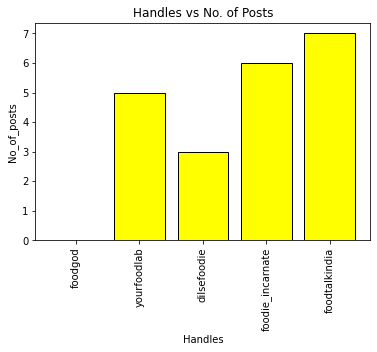

In [89]:
import matplotlib.pyplot as plt
handles=[]
number_of_posts=[]
for i in number:
    handles.append(i)
    number_of_posts.append(number[i])
plt.bar(handles,number_of_posts,color='yellow',edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('No_of_posts')
plt.title('Handles vs No. of Posts')
plt.show()

# 2.Your friend also needs a list of hashtags that he should use in his posts.

# 2.1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

Similar to Q1.2.Just 1 difference we have to here scrap the content

In [108]:
from selenium.common.exceptions import NoSuchElementException
top_5_handle={}

for i in handles:
    top_10_post={}
    a=driver.find_element_by_xpath('/html/body/div[1]/section/nav/div[2]/div/div/div[2]/input')
    a.send_keys(i)   
    time.sleep(2)
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div').click()
    driver.implicitly_wait(3)
    driver.execute_script('window.scrollBy(0,500);')                 ##to move a little lower
    time.sleep(2)
    posts=driver.find_elements_by_class_name("eLAPa")
    time.sleep(5)
    
    for j in range(10):
        post=posts[j]
        driver.execute_script('window.scrollBy(0,25);')
        driver.implicitly_wait(3)
        post.click()
        time.sleep(2)  
        ###Till here it is similar to earlier where we have just opened the post
        
        try:
            b=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').text
        ##I have applied this code because due to some reason my 1 post was not opening so it should that.To bypass it we
        #can you except  
        except NoSuchElementException: 
            j-=1
            continue
            
        top_10_post['POST '+str(j+1)]=b            ##saving in dictionary
        print(b)                                   ##Here I have printed the comment
        time.sleep(2)
        close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
        close.click()
        time.sleep(2)
    driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')   ##to move up to top
    time.sleep(3)
    top_5_handle[i]=top_10_post
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))
    a.clear()
    time.sleep(2)
    
    
for key in top_5_handle.keys():
    p=top_5_handle[key]
    print(key)
    i=0
    for key in p:
        print("**************************post",i+1,"****************************************")
        print(p[key])
        i=i+1
        print()

COOL MASHUP.. Mochi and a Cookie 🍪 in one??!!!!
I can live without Saturday what about you?⁣??
⁣
⁣
📹 @grubspot
French Fry 🍟 Pepperoni 🍕... too much or just right???
Miami’s HOTTEST new SPOT!! @joshrichards

At @strawberrymoon @davegrutman @pharrell
Can you guess what I’m eating? 3 guesses
Who needs the ice cream store?? LOL⁣
⁣
⁣
📹 beautyhomeflour/tiktok
Haha his first time trying sushi 🍣 @minijakepaul
Happy Birthday @victoriabeckham you are not just an icon but beautiful inside and OUT!!
Love this Hack.. what would you add inside??⁣⁣
⁣⁣
⁣⁣
📹 douyin/miaobianshishen
Would you eat a thin and crispy burger 🍔 like this??
Hi guys! I have been planning to live stream on the platform from a very long time. Also we have not really interacted from quite sometime now. So tomorrow (16/05/2021) I'll be live on my YouTube channel prepping up No Bake Mango Cheesecake live!!!

A lot of you guys made it at home and loved it. But there are quite a few of you who had some doubts and queries. I will prep 

EASY CARAMEL CUSTARD PUDDING🍮🍮 that anyone can make at home easily🤗🤗
.
1) Heat sugar in a pan on medium flame until you see golden caramel color. Pour this hot caramel sugar in a baking mould/dish.
2) In a blender jar add white bread slices(edges removed) to form a smooth powder consistency.
3) Dissolve 2tbsp custard powder with 4tbsp water/milk in a bowl. Keep it aside.
4) Heat milk in a pot. As soon as it boils, reduce the flame & add the dissolved custard powder. You can also add sugar if you want the taste to be on sweeter side.
5) After 30 seconds add the bread mixture. Whisk/stir to mix the bread custard into a thick smooth mixture.
6) Add this custatd bread mix over the caramel in the baking mould/dish.
7) Cover it with foil paper & steam it on medium flame for 20-30 minutes.
8) Enjoy it hot or serve it chilled 🤗🤗
.
#foodieincarnate #sodelhi #newdelhi #foodtalkindia #desifood #delhigram #indianfood #caramelcustard #indianrecipe #easyrecipe #soulfood #vscofood #f52grams #nomnom #

Bubblegum?
An easy fruit juice recipe, the uprising Sun refresher! This tangy drink is flavoured with mint and antioxidant-rich pomegranate juice.

Ingredients: 
3 large mint leaves (minced) 
1 teaspoon sugar 
1 cup fresh pineapple juice 
Ice cubes 
1 tablespoon fresh pomegranate juice

Directions: Put the mint and sugar in a tall glass and mash them together to muddle. Stir in the pineapple juice. Add enough ice to fill the glass. Add the pomegranate juice and do not stir. Serve.

PS. One serving has 146 cal, 0 gm total fat, 0 gm saturated fat, 36 gm carb, 0 gm fiber. 

📸: @minh_ngoc
foodgod
**************************post 1 ****************************************
COOL MASHUP.. Mochi and a Cookie 🍪 in one??!!!!

**************************post 2 ****************************************
I can live without Saturday what about you?⁣??
⁣
⁣
📹 @grubspot

**************************post 3 ****************************************
French Fry 🍟 Pepperoni 🍕... too much or just right???

**********

# 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [110]:
totalfreq={}
all_word=[]
for key in top_5_handle.keys():
    p=top_5_handle[key]
    i=0
    for key in p:
        data=p[key]
        s=data.split()
        for k in s:
            if k[0]=='#':                                               #only fetching hastages
                ans=k[1:]
                all_word.append(ans)
                if ans in totalfreq:
                    totalfreq[ans]+=1
                else:
                    totalfreq[ans]=1
print(totalfreq) 
print()
print(all_word)

{'food': 3, 'livestream': 1, 'livestreaming': 1, 'foodcooking': 1, 'cookingclass': 1, 'livecooking': 1, 'livecookingclass': 1, 'sanjyotkeer': 10, 'yourfoodlab': 9, 'recipes': 2, 'recipeoftheday': 2, 'indiancuisine': 8, 'streetfood': 11, 'foodporn': 14, 'foodphotography': 3, 'streetfoodindia': 9, 'kofta': 1, 'koftarecipe': 1, 'Malaikofta': 1, 'instadaily': 5, 'YFLapron': 1, 'recipe': 4, 'nachos': 1, 'nachoslover': 1, 'nachoscheese': 1, 'cheese': 1, 'cheeselover': 1, 'nachostime': 1, 'nachosoverload': 1, 'foodstagram': 1, 'dal': 1, 'dalrecipe': 1, 'dalkhichdi': 1, 'mutton': 4, 'muttonrecipes': 4, 'muttonshami': 2, 'foodie': 7, 'mumbaifoodie': 3, 'homemadefood': 2, 'mango': 1, 'mangoseason': 1, 'mangolover': 1, 'mangoes': 1, 'mangomango': 1, 'aam': 1, 'homemade': 1, 'aamkilaunji': 1, 'indianfood': 6, 'chicken': 2, 'chickenrecipes': 2, 'baidaroti': 2, 'kolkatafoodie': 2, 'kolkatagram': 2, 'kolkatastreetfood': 2, 'mumbaistreetfood': 6, 'bhuna': 2, 'streetstyle': 1, 'dilsefoodie': 10, 'lockd

# 2.3 Create a csv file with two columns : the word and its frequency

In [111]:
import pandas as pd
import numpy as np
li_2d=[]
for i in totalfreq:
    s=[]
    s.append(i)
    s.append(totalfreq[i])
    li_2d.append(s)
final_data=np.array(li_2d)
dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
dataset.to_csv('Frequency.csv',index=False)
print(dataset)

                     Word Frequency
0                    food         3
1              livestream         1
2           livestreaming         1
3             foodcooking         1
4            cookingclass         1
..                    ...       ...
157           delhihotels         1
158            malaitoast         1
159  SmallPlatesBigHearts         1
160        HappyHummusDay         1
161     GinerosityWithGin         1

[162 rows x 2 columns]


# 2.4 Now, find the hashtags that were most popular among these bloggers

In [113]:
t=1
top_5_hash=[]
top_5_times=[]
for i in sorted (totalfreq.items(), key = lambda kv: kv[1],reverse=True):
    top_5_hash.append(i[0])
    top_5_times.append(i[1])
    print(i)
    t+=1
    if t>5:
        break

('foodporn', 14)
('streetfood', 11)
('sanjyotkeer', 10)
('dilsefoodie', 10)
('foodieincarnate', 10)


# 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

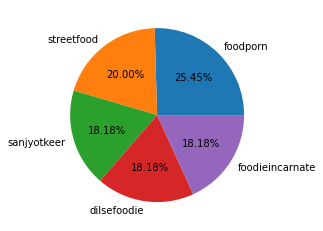

In [114]:
plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.show()

# 3.You need to also calculate average followers : likes ratio for the obtained handles.


Followers : Likes ratio is calculated as follows:





1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

2.Calculate the average likes for a handle.

3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

4.Create a bar graph to depict the above obtained information.

First I will get the sum of likes of all the handles and store the average likes in a dictionary

# 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

Similar to many questions done before but there is a difference on how to find the likes here.
The place where there are views we have to first first click on that then no of likes will come.

In [156]:
from selenium.common.exceptions import NoSuchElementException

top_5_handle_likes={}

for i in handles:
    
    top_10_post={}
    a=driver.find_element_by_xpath('/html/body/div[1]/section/nav/div[2]/div/div/div[2]/input')
    a.send_keys(i)   
    time.sleep(1)
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div').click()
    time.sleep(2)
    driver.execute_script('window.scrollBy(0,500);')
    time.sleep(1)
    posts=driver.find_elements_by_class_name("eLAPa")
    time.sleep(1)
    totalLikes = 0
    for j in range(10):
        post=posts[j]
        driver.execute_script('window.scrollBy(0,50);')
        driver.implicitly_wait(1)
        post.click()
        time.sleep(2)
        
        ##Here we will check if there are likes present or no of views
        
        try:
            ##if the likes are present then there is Nm9Fw class present
            
            likes = int(driver.find_element_by_css_selector("div.Nm9Fw span").text.replace(",", ""))
            totalLikes += likes
        ##if that class is not present then it is no of views
        except NoSuchElementException:
            driver.find_element_by_class_name("vcOH2").click()  ##clicking on no of views
            time.sleep(1)
            likes=int(driver.find_element_by_css_selector("div.vJRqr span").text.replace(",", ""))   ##finding no of likes
            totalLikes += likes
            driver.find_element_by_class_name("QhbhU").click()
            time.sleep(1)
        close = driver.find_element_by_xpath("//body/div[last()]/div[last()]/button")
        close.click()
        time.sleep(2)
        
    driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);') 
    time.sleep(1)
    top_5_handle_likes[i]=totalLikes
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))
    a.clear()
    time.sleep(2)
    
for i in top_5_handle_likes:
    print(i,top_5_handle_likes[i])


foodgod 290668
yourfoodlab 236838
dilsefoodie 132170
foodie_incarnate 205391
foodtalkindia 8833


# 3.2 Calculate the average likes for a handle.

In [138]:
for i in top_5_handle_likes:
    p=top_5_handle_likes[i]
    top_5_handle_likes[i]=p/10
    print( top_5_handle_likes[i])

29066.8
23683.8
13217.0
20539.1
883.3


# 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [150]:
ratio={}
top_5={}
avg_follower=[]
for i in top_5_handle_likes:
    ratio[i]=top_5_handle_likes[i]/markdict[i]
for i in ratio:
    print(i," ",ratio[i])
    avg_follower.append(ratio[i])

foodgod   0.0082016629171507
yourfoodlab   0.014154700154373836
dilsefoodie   0.016943872540850155
foodie_incarnate   0.054843180082562094
foodtalkindia   0.002899783000502283


# 3.4 Create a bar graph to depict the above obtained information.

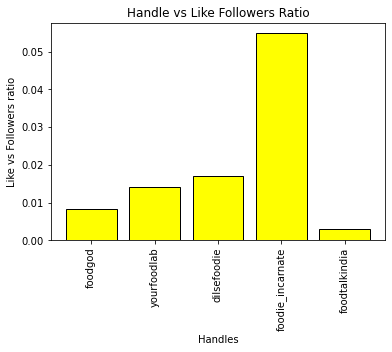

In [153]:
plt.bar(handles,avg_follower,color='yellow',edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()